# **Data Analytics I**

# Illustration Asymptotic Properties

**Author:** [Anthony Strittmatter](http://www.anthonystrittmatter.com)

We investigate the finite sample properties of the estimator
\begin{equation*}
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i.
\end{equation*}
for increasing sample sizes. Therefore, we conduct a simulation study (Monte Carlo study). We randomly generate a binary variable $x$ for a sample of size $N$, with $x \in \{0,1\}$ and $E[x]=Pr(x=1)= \mu$. To lean about the finite sample behavior of estimators we repeat this DGP 2,000 times and estimate in each repetition the sample average of $x$. This gives us information about the finite sample distribution of the estimator. 

## Define the Input Factors

In [16]:
############## Define Input Factors ##############

# Define Sample Sizes
sample_size <- c(10, 50, 200, 800, 4000, 12000)
rep <- 2000 # Number of replications
mu = 0.5

print('Input factors defined.')

[1] "Input factors defined."


## Data Generating Process (DGP)

We generate a random sample of the binary dummy variable $x$. Then we calculate the sample average and variance of $x$ and store the results in matrices.

In [17]:
############## Estimation of Sample Average ##############

# Set starting value for random number generators, such that results can be replicated
set.seed(1001)

# Generate matrices to store the results
average <- matrix(NA, nrow = rep, ncol = length(sample_size))
variance <- matrix(NA, nrow = rep, ncol = length(sample_size))
# Rows correspond to different replications
# Columns correspond to different sample sizes

# Make a loop
for (i in c(1:rep)) {
    for (n in c(1:length(sample_size))) {
        
        # Generate dummy with Pr(x= 1) = mu
        x <- rbinom(sample_size[n], 1, mu)
        # Example: x could be a dummy for females
        
        # Calculate sample average and variance
        average[i,n] <- mean(x) # calculate sample average for each replication
        variance[i,n] <- var(x) # calculate sample average for each replication
    
    }
}

print('Sample averages are estimated')

[1] "Sample averages are estimated"


## Law of Large Numbers

The *probability* that the absolute estimation bias of the sample average exceeds any positive constant converges to zero when the sample size converges to infinity.

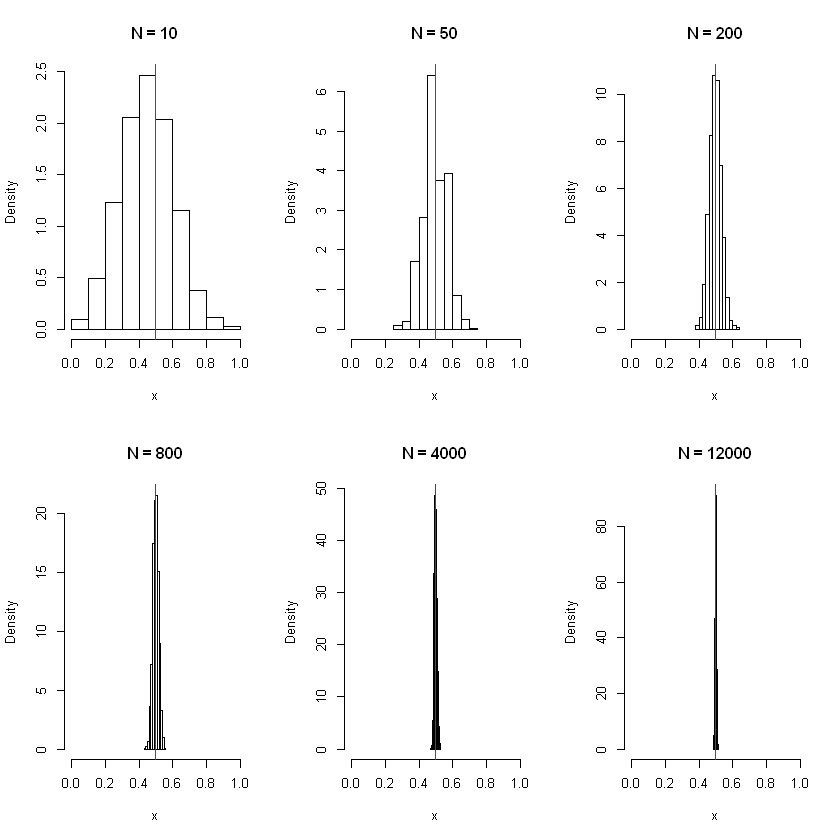

In [18]:
############## Law of Large Numbers ##############

# Plot Panel
par(mfrow = c(2, 3))

# Histogram
for (n in c(1:length(sample_size))) {
    hist(average[,n],xlim = c(0,1), freq = FALSE, main = paste("N =", sample_size[n]), xlab = "x")
    abline(v=mu, col="red")
}

# Central Limit Theorem

The standardized mean
\begin{equation*}
\sqrt{N} \cdot\frac{\bar{x} - \mu}{\sqrt{Var(x)}}
\end{equation*}
is converging to a standard normal distribution when the sample size converges to infinity.

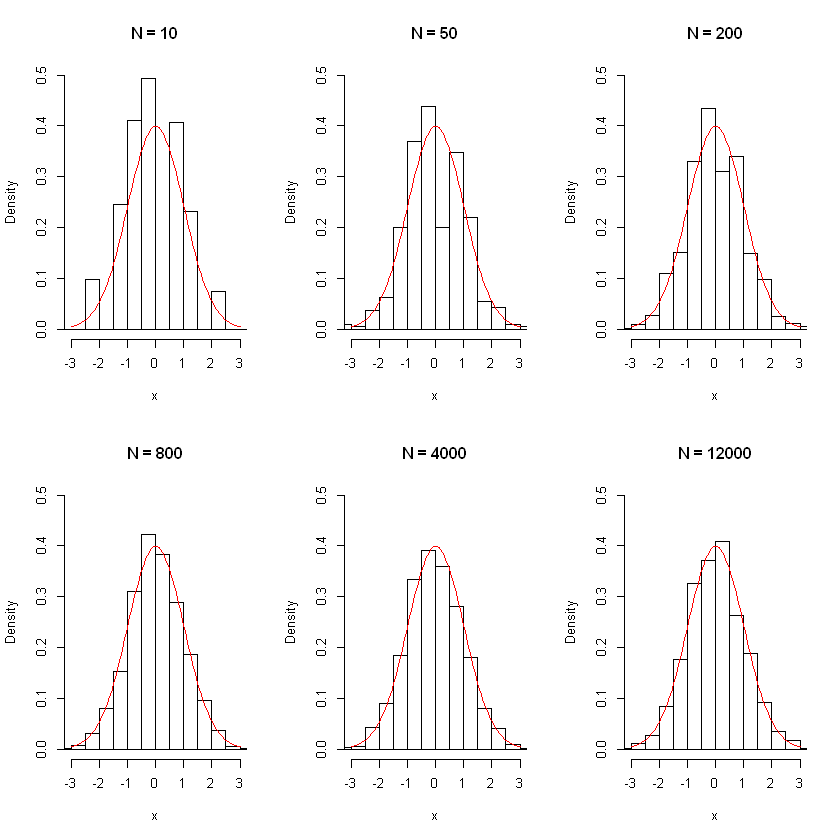

In [19]:
############## Central Limit Theorem ##############

# Generate matrix to store results
dev <- matrix(NA, nrow = rep, ncol = length(sample_Size))

# Standardize x
for (n in c(1:length(sample_size))) {
    dev[,n] <- sqrt(sample_size[n])*(average[,n]-mu)/sqrt(variance[,n])
}

# Plot Panel
par(mfrow = c(2, 3))

# Histogram
for (n in c(1:length(sample_size))) {
    hist(dev[,n], breaks = 20, xlim = c(-3,3), ylim = c(0,.5), freq = FALSE, main = paste("N =", sample_size[n]), xlab = "x")
    curve(dnorm(x), col = "red", add = TRUE)
}